<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/9%3A%20Univariate_Outliers_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Discussion Related With Outliers And Impact On Machine Learning!!

##### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/ML_Data_and_Resources/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

#1. Histogram

In [4]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


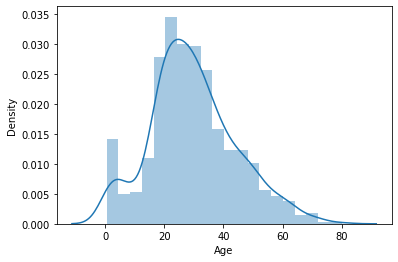

In [5]:
sns.distplot(df['Age'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


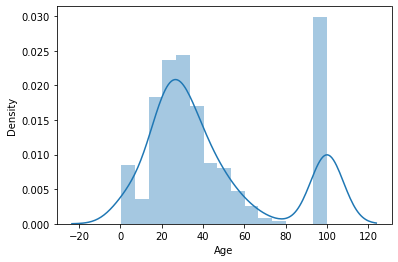

In [6]:
sns.distplot(df['Age'].fillna(100))

We can delete the the point far away from peak.

#2. IQR 

When data is Gaussian Distributed

Text(0, 0.5, 'No of passenger')

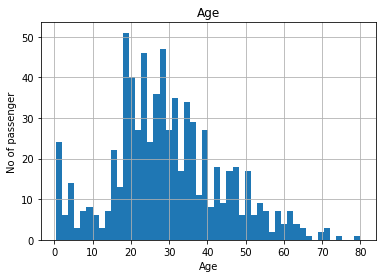

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

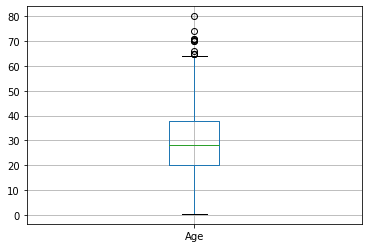

In [8]:
figure=df.boxplot(column="Age")

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

If The Data Is Normally Distributed We use IQR method

In [10]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

#3. Boxplot

If Features Are Skewed We Use the below Technique 

Text(0, 0.5, 'No of passenger')

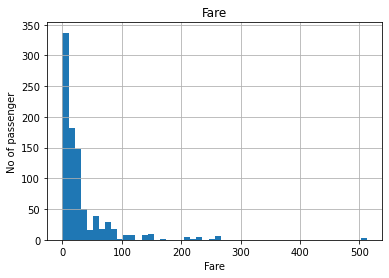

In [11]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

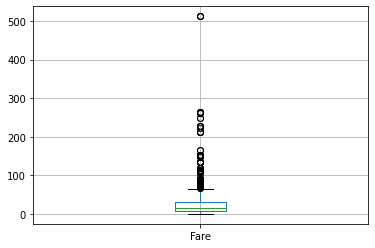

In [12]:
df.boxplot(column="Fare")

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [15]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [16]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [17]:
data=df.copy()

In [18]:
data.loc[data['Age']>=73,'Age']=73

In [19]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

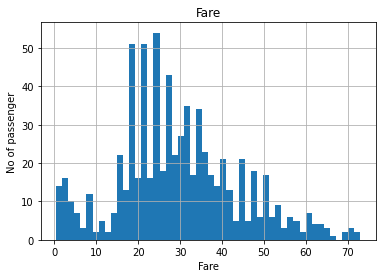

In [20]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

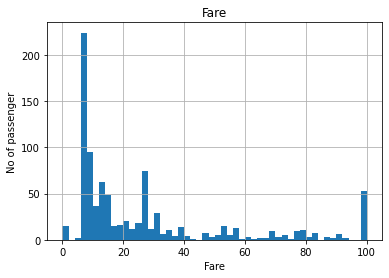

In [21]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

#4. Z-Score

$ Z-score = \frac{x - mean}{Standard Deviation}$



In [24]:
df['zscore'] = (df.Age-df.Age.mean())/df.Age.std()
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,-1.975639
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,-0.943043
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,0.330491
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,0.364911
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0.158392


In [25]:
df.zscore.min(), df.zscore.max()

(-2.0155662426542023, 3.462698625977656)

In [28]:
outliers_z = df[(df.zscore < -1.5) | (df.zscore > 3)]
outliers_z.sample(5), outliers_z.shape

(     PassengerId  Survived  Pclass  ... Cabin Embarked    zscore
 831          832         1       2  ...   NaN        S -1.987342
 7              8         0       3  ...   NaN        S -1.906799
 530          531         1       2  ...   NaN        S -1.906799
 827          828         1       2  ...   NaN        C -1.975639
 183          184         1       2  ...    F4        S -1.975639
 
 [5 rows x 13 columns], (52, 13))

#5. Modified Z-Score

Z-score is easy to calculate using mean and standard deviation, but it has its own limitations. There are a few situations when it’s not an ideal technique, for example:
* the data are not normally distributed
* data/sample size is small

In addition to these, Z-score is sensitive to extreme values (because one of its parameters — mean — itself is sensitive to extreme values), so it may fail to screen outliers appropriately.
To overcome these shortcomings, several modifications are made to the standard Z-score:
* median is used instead of the mean as a parameter, since the median is less sensitive to outliers
* Median Absolute Deviation (MAD) is used in lieu of standard deviation
* The values are multiplied by a constant so that it is approximately equal to SD (for normally distributed data, MAD is approximately equal to 0.6745*SD)


Putting them all together, the equation looks like the following:

$ Modified Z-score = \frac{0.6745(x - mean)}{Standard Deviation}$

In [29]:
df['mod_zscore'] = (0.6745*(df.Age-df.Age.mean()))/df.Age.std()
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore,mod_zscore
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.050,NaN,S,NaN,NaN
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C,NaN,NaN
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S,-1.287242,-0.868245
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.900,NaN,S,-1.975639,-1.332569
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.050,NaN,S,0.984469,0.664024


In [30]:
df.mod_zscore.min(), df.mod_zscore.max()

(-1.3594994306702592, 2.335590223221929)

In [31]:
outliers_z = df[(df.zscore < -1) | (df.zscore > 2)]
outliers_z.sample(5), outliers_z.shape

(     PassengerId  Survived  Pclass  ... Embarked    zscore  mod_zscore
 644          645         1       3  ...        C -1.992849   -1.344177
 570          571         1       2  ...        S  2.223584    1.499807
 33            34         0       2  ...        S  2.498943    1.685537
 489          490         1       3  ...        S -1.424921   -0.961110
 435          436         1       1  ...        S -1.080723   -0.728948
 
 [5 rows x 14 columns], (111, 14))